In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt

import PySpice

PySpice.Spice.Simulation.CircuitSimulator.DEFAULT_SIMULATOR="xyce-serial"

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


In [29]:
PySpice.Spice.Simulation.CircuitSimulator.DEFAULT_SIMULATOR

'xyce-serial'

In [30]:
circuit = Circuit('Low-Pass RC Filter')

circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
R1 = circuit.R(1, 'in', 'out', 1@u_kΩ)
C1 = circuit.C(1, 'out', circuit.gnd, 1@u_uF)

In [32]:
break_frequency = 1 / (2 * math.pi * float(R1.resistance * C1.capacitance))
print("Break frequency = {:.1f} Hz".format(break_frequency))

Break frequency = 159.2 Hz


In [34]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=1@u_MHz, number_of_points=10,  variation='dec')
# print(analysis.out)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpx0sh3zt7/output.raw'

NameError: name 'analysis' is not defined

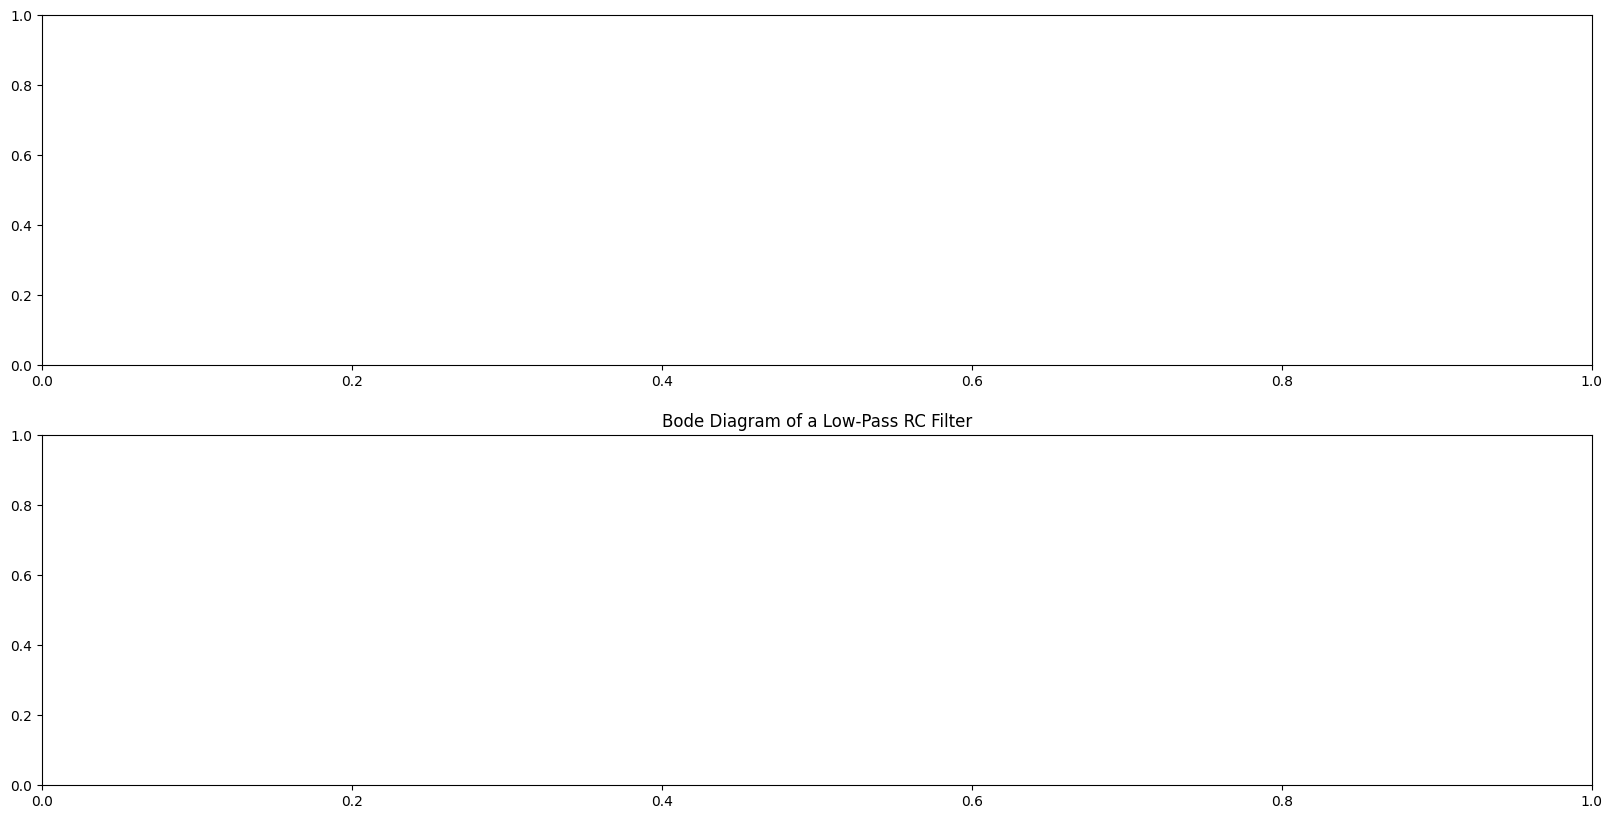

In [19]:
figure, axes = plt.subplots(2, figsize=(20, 10))
plt.title("Bode Diagram of a Low-Pass RC Filter")
bode_diagram(axes=axes,
             frequency=analysis.frequency,
             gain=20*np.log10(np.absolute(analysis.out)),
             phase=np.angle(analysis.out, deg=False),
             marker='.',
             color='blue',
             linestyle='-',
)
for ax in axes:
    ax.axvline(x=break_frequency, color='red')

plt.tight_layout()
plt.show()

## Voltage Divider

In [35]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

import PySpice
PySpice.Spice.Simulation.CircuitSimulator.DEFAULT_SIMULATOR="xyce-serial"

In [36]:
circuit = Circuit('Voltage Divider')

circuit.V('input', 'in', circuit.gnd, 10@u_V)
circuit.R(1, 'in', 'out', 9@u_kΩ)
circuit.R(2, 'out', circuit.gnd, 1@u_kΩ)


simulator = circuit.simulator(temperature=25, nominal_temperature=25)

analysis = simulator.operating_point()
for node in (analysis['in'], analysis.out): # .in is invalid !
    print('Node {}: {} V'.format(str(node), float(node)))

Node in: 10.0 V
Node out: 1.0 V


/tmp/ipykernel_537/910148347.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {} V'.format(str(node), float(node)))


In [37]:
# Fixme: Xyce sensitivity analysis
analysis = simulator.dc_sensitivity('v(out)')
for element in analysis.elements.values():
    print(element, float(element))

NameError: Errors was found by Xyce